In [1]:
# Daily Data is from: NCEP Climate Forecast System Reanalysis (CFSR) 6-hourly Products, January 1979 to December 2010
# Monthly and Anual data is from: NCEP Climate Forecast System Reanalysis (CFSR) Monthly Products, January 1979 to December 2010

# https://rda.ucar.edu/#!lfd?nb=y&b=proj&v=NCEP%20Climate%20Forecast%20System%20Reanalysis

In [32]:
import xarray as xr
from cartopy import crs
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib
from faceted import faceted as fc
from cmocean import cm
import numpy as np
import seaborn as sns

%matplotlib inline

In [27]:
# Calculate the forcing.
h = 6.6*10**-34;
c = 3*10**8;
kb = 1.38*10**-23;
lrot = 56*100;
lvr = 40*100;
RH_ref = 80;

def B(nu,T):
    return 2 * h * c**2 * nu**3 / (np.exp(h * c * nu / (kb * T)) - 1) 

def F(Ts,Ttp,RH):
    return lrot * np.log(RH_ref/RH) * np.pi * ( B(800*100,Ts) - B(150*100,Ttp) ) + lvr * np.log(RH_ref/RH) * np.pi * ( B(1200*100,Ts) - B(1500*100,Ttp) )

# B = np.vectorize(B)
# F = np.vectorize(F)

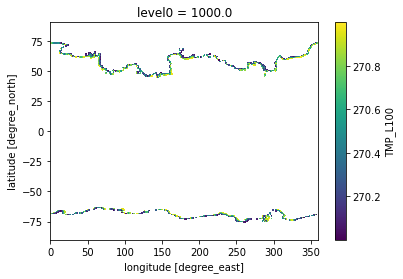

In [57]:
ts.where(ts>270).where(ts<271).plot()

In [61]:
olr_data

<xarray.Dataset>
Dimensions:                (lat: 576, lon: 1152, ntb: 2, time: 5)
Coordinates:
  * time                   (time) datetime64[ns] 1981-03-22 ... 1981-03-23
  * lat                    (lat) float32 89.761 89.4514 ... -89.4514 -89.761
  * lon                    (lon) float32 0.0 0.3125 0.625 ... 359.375 359.6875
Dimensions without coordinates: ntb
Data variables:
    time_bnds              (time, ntb) datetime64[ns] ...
    valid_date_time_range  (time, ntb) |S10 ...
    ref_date_time          (time) |S10 ...
    forecast_hour          (time) timedelta64[ns] 06:00:00 06:00:00 ... 06:00:00
    CSULF_L1_Avg_1         (time, lat, lon) float32 212.0 212.0 ... 168.0 168.0
    CSULF_L8_Avg_1         (time, lat, lon) float32 183.0 183.0 ... 159.0 159.0
Attributes:
    Creation date and time:  2020-03-21 11:10:26 -0600
    Conventions:             CF-1.5
    Creator:                 NCAR - CISL RDA (dattore)

In [60]:
olr_data.CSULF_L8_Avg_1.mean('time').where(ts>270).where(ts<271).plot()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [18]:
olr_data = xr.open_dataset('/home/bmckim/Downloads/flxf06.gdas.19810321-19810325.grb2.nc')
cloud_olr_data = xr.open_dataset('/home/bmckim/Downloads/flxf06.gdas.19810321-19810325.grb2(1).nc')
# cloud_year_olr_data = xr.open_dataset('/home/bmckim/Downloads/ 	flxf06.gdas.1981.grb2-1.nc')
month_olr_data = xr.open_dataset('/home/bmckim/Downloads/flxf06.gdas.1981.grb2.nc')
year_olr_data = xr.open_dataset('/home/bmckim/Downloads/flxf06.gdas.1981.grb2(1).nc')
temp_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.19810321-19810325.grb2(2).nc')
month_temp_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.1981.grb2(1).nc')
year_temp_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.1981.grb2(3).nc')
old_rh_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.19810321-19810325.grb2.nc')
new_rh_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.19810321-19810325.grb2(3).nc')
month_rh_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.1981.grb2.nc')
old_year_rh_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.1981.grb2(2).nc')
new_year_rh_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.1981.grb2(4).nc')
water_data = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.19810321-19810325.grb2(1).nc')

In [31]:
temp_data.TMP_L100.sel(level0=1000).time

<xarray.DataArray 'time' (time: 5)>
array(['1981-03-22T00:00:00.000000000', '1981-03-22T06:00:00.000000000',
       '1981-03-22T12:00:00.000000000', '1981-03-22T18:00:00.000000000',
       '1981-03-23T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-03-22 1981-03-22T06:00:00 ... 1981-03-23
    level0   float32 1000.0
Attributes:
    name:       time
    long_name:  time

In [20]:
# rh = rh_data.R_H_L200.mean('time')
rh = new_rh_data.R_H_L100.mean(('level0','time'))
ts = temp_data.mean('time').TMP_L100.sel(level0=1000)
ttp = temp_data.mean('time').TMP_L100.sel(level0=20)
forcing = xr.DataArray(data=F(ts,ttp,rh),
                         coords={'lat': (['lat'], rh.lat.values),
                                 'lon': (['lon'], rh.lon.values)},
                         dims=['lat','lon'])

In [21]:
proj=ccrs.Robinson(central_longitude=180)
trans=ccrs.PlateCarree()

/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


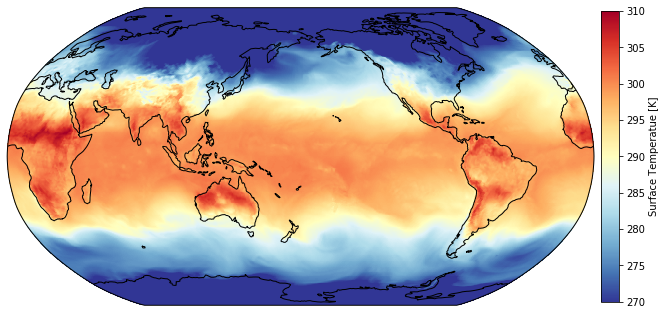

In [22]:
# vmin=270, vmax=310
fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
c = ts.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='RdYlBu_r',vmin=270,vmax=310)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(c, cax=cax, orientation='vertical', label='Surface Temperatue [K]')
fig.show()

# fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = month_temp_data.sel(level0=1000).TMP_L100_Avg.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='RdYlBu_r',vmin=270,vmax=310)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Surface Temperatue [K]')
# fig.show()

# fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = year_temp_data.sel(level0=1000).mean('time').TMP_L100_Avg.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='RdYlBu_r',vmin=270,vmax=310)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Surface Temperatue [K]')
# fig.show()

In [23]:
anom = olr_data.mean('time').CSULF_L8_Avg_1 - 260

/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


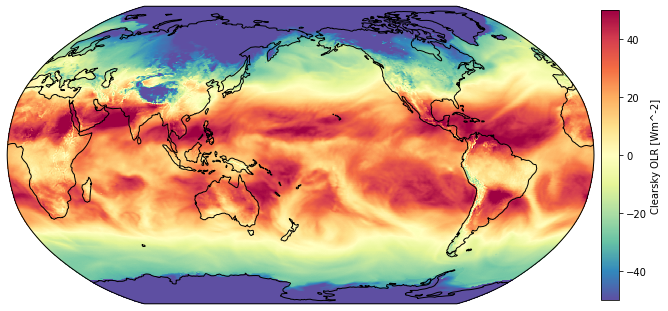

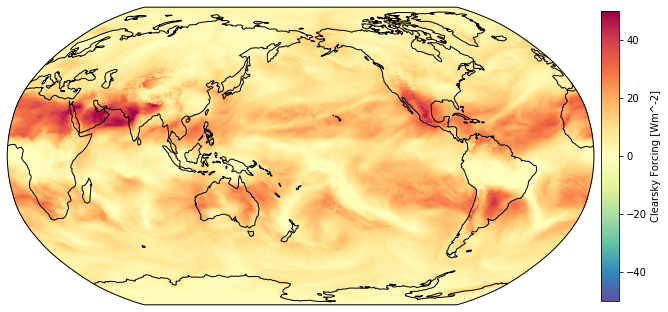

In [28]:
# vmin=190, vmax=320
# fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = olr_data.mean('time').CSULF_L8_Avg_1.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=310,vmin=200)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Clearsky OLR [Wm^-2]')
# fig.show()

# fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = cloud_olr_data.mean('time').ULWRF_L8_Avg_1.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r')
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Totalsky OLR [Wm^-2]')
# fig.show()

# fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = month_olr_data.sel(time='1981-03-16').CSULF_L8_FcstAvg6hr.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=310,vmin=200)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Clearsky OLR [Wm^-2]')
# fig.show()

# fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = year_olr_data.mean('time').CSULF_L8_FcstAvg6hr.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=310,vmin=200)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Clearsky OLR [Wm^-2]')
# fig.show()

fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
c = anom.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=50,vmin=-50)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(c, cax=cax, orientation='vertical', label='Clearsky OLR [Wm^-2]')
fig.show()

fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
c = forcing.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=50,vmin=-50)
ax[0].coastlines()
plt.colorbar(c, cax=cax, orientation='vertical', label='Clearsky Forcing [Wm^-2]')
fig.show()

/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


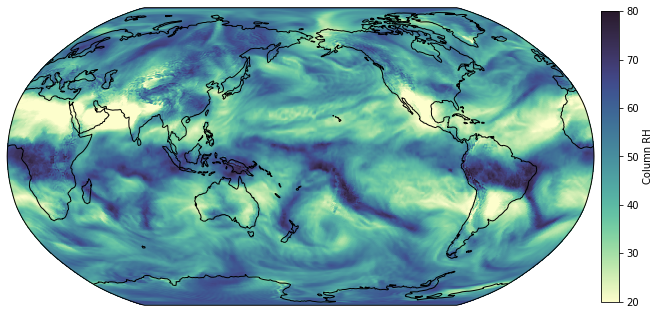

In [11]:
# fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = water_data.P_WAT_L200.mean('time').plot(ax=ax[0], transform=trans,add_colorbar=False,cmap=cm.rain,vmin=0)
# ax[0].coastlines()
# plt.colorbar(c, cax=cax, orientation='vertical', label='Precipitable Water [cm]')
# fig.show()

fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
c = new_rh_data.R_H_L100.mean(('level0','time')).plot(ax=ax[0], transform=trans,add_colorbar=False,cmap=cm.deep,vmax=80,vmin=20)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(c, cax=cax, orientation='vertical', label='Column RH')
fig.show()

# fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = new_year_rh_data.R_H_L100_Avg.isel(time=2).mean('level0').plot(ax=ax[0], transform=trans,add_colorbar=False,cmap=cm.deep,vmax=80,vmin=20)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Column RH')
# fig.show()

# fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
# c = new_year_rh_data.R_H_L100_Avg.mean(('time','level0')).plot(ax=ax[0], transform=trans,add_colorbar=False,cmap=cm.deep,vmax=80,vmin=20)
# ax[0].coastlines()
# ax[0].set_title('')
# plt.colorbar(c, cax=cax, orientation='vertical', label='Column RH')
# fig.show()

In [ ]:
# # WORKING EXAMPLE
# plt.figure(figsize=(10, 6))
# ax_p = plt.gca(projection=ccrs.Robinson(), aspect='auto')
# da.plot.imshow(ax=ax_p, transform=ccrs.PlateCarree());
# plt.show()

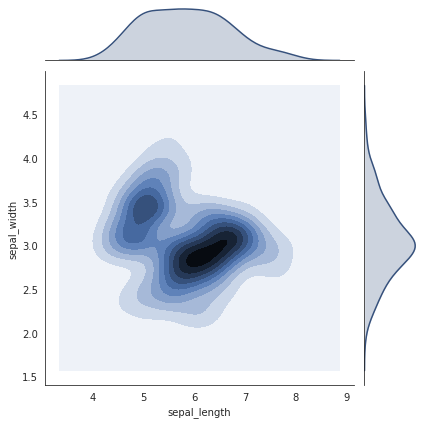

In [45]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

with sns.axes_style("white"):
#     sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
    sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color='#36517c')
    plt.show()